In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv('2017.csv')

In [5]:
x = ds['Economy..GDP.per.Capita.'].values.reshape(-1,1)
y = ds['Happiness.Score'].values.reshape(-1,1)

In [4]:
lr = LinearRegression()

In [5]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print("Beta 0: {}\nBeta 1: {}".format(lr.intercept_,lr.coef_))

Beta 0: [3.20321268]
Beta 1: [[2.18418495]]


In [7]:
y_pred_regression_fit = lr.predict(x)

In [8]:
rmse = sqrt(mean_squared_error(y,y_pred_regression_fit))
print("RMSE regression fit: {}".format(rmse))

RMSE regression fit: 0.6573815994500275


                Gradient Descent

In [9]:
# weights initialized randomly
b_0, b_1 = 0,1

In [10]:
h_x = []
n = len(x)
g_b_0 = 0
g_b_1 = 0
err_fun = []
err = 0

In [11]:
# predicted values for the parameters initialized randomly
h_x = [(b_0 + b_1 * x[i]) for i in range(n)]

In [12]:
# error is high so gradient descent is used
rmse_g = sqrt(mean_squared_error(y,h_x))
print("RMSE: {}".format(rmse_g))

RMSE: 4.446306388852043


In [13]:
len(x)

155

In [1]:
c = 0
# list of rmse
rmse_lis = [rmse_g]

b_0_plot = []
b_1_plot = []
tolerance = 0.00001
eta = 0.00000001
while 1:
    
    err = 0
    for j in range(n):
        
        derv_b0 = (y[j]-h_x[j])
        derv_b1 = (y[j]-h_x[j])*x[j]
        g_b_0 = g_b_0 - derv_b0
        g_b_1 = g_b_1 - derv_b1
        err += ((y[j]-h_x[j])**2)
    err_fun.append(1/2*1/n*err)
    
    #new b0
    b_0 = b_0 - (eta * g_b_0)
    #new b1
    b_1 = b_1 - (eta * g_b_1)
    #new model
    h_x = [(b_0 + b_1 * x[i]) for i in range(n)]
    rmse_g = sqrt(mean_squared_error(y,h_x))
    b_0_plot.append(b_0)
    b_1_plot.append(b_1)
    
    if c>=1:
        if abs(err_fun[c]-err_fun[c-1])<tolerance:
            rmse_lis.append(rmse_g)
            c+=1
            break
    print(err_fun[c])
    c+=1
    rmse_lis.append(rmse_g)

NameError: name 'rmse_g' is not defined

In [15]:
print("No. of iterations: {}\nRMSE Gradient fit: {}".format(c,rmse_g))

No. of iterations: 4396
RMSE Gradient fit: 0.6575992427077946


In [16]:
print("Beta 0: {}\nBeta 1: {}".format(b_0,b_1))

Beta 0: [3.24078443]
Beta 1: [2.1596737]


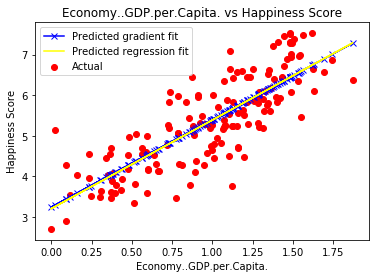

In [17]:
plt.scatter(x, y, color = 'red', marker='o', label='Actual')
plt.plot(x, h_x, color = 'blue', label='Predicted gradient fit',marker='x')
plt.plot(x, y_pred_regression_fit, color = 'yellow', label='Predicted regression fit')

plt.title('Economy..GDP.per.Capita. vs Happiness Score')
plt.legend()
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness Score')
plt.show()

In [18]:
print("Predicted Value using gradient:\n{}\nPredicted Value using regression:\n{}\nActual Value:\n{}".format(h_x,y_pred_regression_fit,y))

Predicted Value using gradient:
[array([6.73181745]), array([6.44224803]), array([6.43846862]), array([6.62062961]), array([6.35842875]), array([6.4888141]), array([6.4353833]), array([6.27665081]), array([6.46817331]), array([6.44663632]), array([6.21116167]), array([5.6373879]), array([6.45242928]), array([6.58019994]), array([6.55740967]), array([6.45421343]), array([6.40207324]), array([7.0028142]), array([6.35424333]), array([5.9463904]), array([6.75315543]), array([5.63230603]), array([6.16213693]), array([5.80063587]), array([5.73128519]), array([6.895552]), array([6.14183057]), array([5.87031608]), array([5.1240241]), array([5.90527848]), array([6.33111219]), array([5.67661295]), array([6.33694995]), array([6.23063209]), array([7.28102788]), array([5.55297931]), array([6.54643186]), array([6.18086896]), array([6.76742889]), array([6.10320204]), array([6.45526924]), array([6.02938841]), array([4.83311013]), array([5.40222992]), array([5.20562208]), array([6.0306247]), array([4.9

In [19]:
len(h_x),len(y_pred_regression_fit),len(y)

(155, 155, 155)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

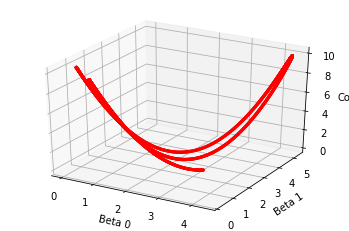

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b_0_plot,b_1_plot,err_fun,c='r',marker='.')
ax.set_xlabel('Beta 0')
ax.set_ylabel('Beta 1')
ax.set_zlabel('Cost')
plt.show()

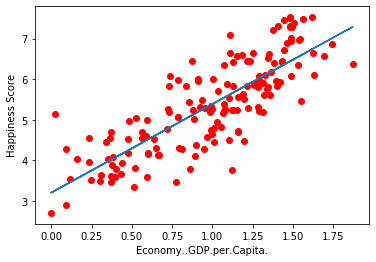

In [22]:
plt.scatter(x,y,c='r')
plt.plot(x,y_pred_regression_fit)
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness Score')
plt.show()

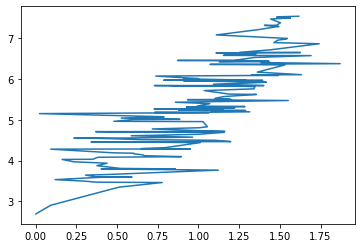

In [23]:
plt.plot(x,y)
plt.show()